<a href="https://colab.research.google.com/github/chaeyh4/SmartFactory/blob/main/VIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [ ]:
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

In [ ]:
tsne = TSNE(n_components=3, n_iter=1000)
tsne_points = tsne.fit_transform(train_x)

In [ ]:
tsne_df = pd.DataFrame(data = tsne_points)

In [ ]:
tsne_df2 = pd.concat([tsne_df, train_df['Y_Class']], axis = 1)

In [ ]:
tsne_df2

,0,1,2,Y_Class
0,17.824293,4.966863,-1.134649,1
1,-1.864904,18.553991,0.305572,2
2,17.892101,5.088619,-1.548232,1
3,-2.283253,18.206703,0.120580,2
4,17.670799,4.946948,-1.786947,1
...,...,...,...,...
593,8.043958,0.119554,4.240327,1
594,16.579515,5.535144,-1.355872,0
595,16.569698,5.549655,-1.334075,0
596,-7.462214,-4.464433,2.237541,1


<ipython-input-22-5e5ce506408e>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


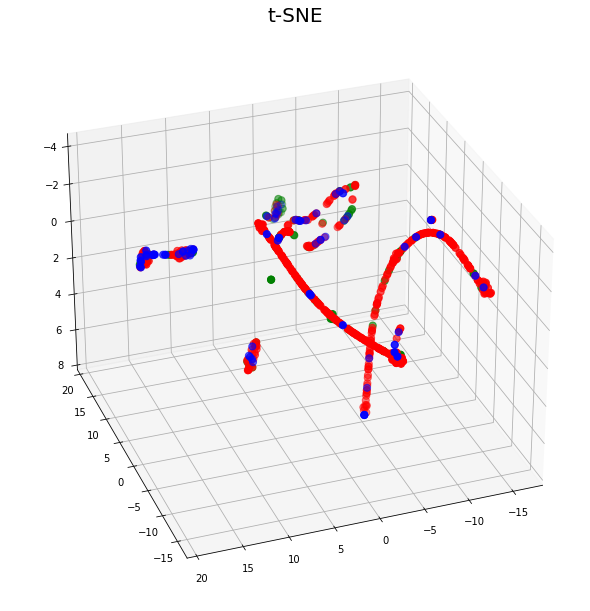

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_title('t-SNE', fontsize = 20)

targets = list(train_df['Y_Class'].unique())
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = tsne_df2['Y_Class'] == target
    ax.scatter(tsne_df2.loc[indicesToKeep, 0],
               tsne_df2.loc[indicesToKeep, 1],
               tsne_df2.loc[indicesToKeep, 2],
               c = color,
               s = 50)
    
ax.grid()

In [ ]:
train_x_encoded = pd.get_dummies(data = train_x, columns = ['LINE'], prefix = 'Line')
train_x_encoded = pd.get_dummies(data = train_x_encoded, columns = ['PRODUCT_CODE'], prefix = 'PRODUCT_CODE')

test_x_encoded = pd.get_dummies(data = test_x, columns = ['LINE'], prefix = 'Line')
test_x_encoded = pd.get_dummies(data = test_x_encoded, columns = ['PRODUCT_CODE'], prefix = 'PRODUCT_CODE')

In [ ]:
from keras.utils import np_utils

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_x_encoded.values,i)for i in range(train_x_encoded.shape[1])]

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif["features"] = train_x_encoded.columns


,VIF Factor,features
0,51216.411786,X_773
1,52452.458453,X_575
2,62674.577509,X_522
3,92065.554798,X_694
4,121817.388112,X_15
...,...,...
2878,NaN,X_2844
2879,NaN,X_2872
2880,NaN,X_2873
2881,NaN,X_2874


In [ ]:
vif_nan = vif.replace([np.inf], np.nan)

In [ ]:
vif_nan = vif.dropna()
vif_nan

,VIF Factor,features
0,5.121641e+04,X_773
1,5.245246e+04,X_575
2,6.267458e+04,X_522
3,9.206555e+04,X_694
4,1.218174e+05,X_15
...,...,...
2492,inf,X_1803
2491,inf,X_1801
2490,inf,X_1475
2495,inf,X_2417


In [ ]:
index = []
index = new_vif.features
index.tolist()

In [ ]:
noVIF = train_x_encoded[index]

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(objective='multi:softmax',eval_metric='merror')
model.fit(X=train_x_encoded, y=train_y)
model

XGBClassifier(eval_metric='merror', objective='multi:softprob')

In [ ]:
test_x_encoded = test_x_encoded[index]

In [ ]:
preds = model.predict(test_x_encoded)

In [ ]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Y_Class'] = preds

In [ ]:
submit.to_csv('./vif_xgboost_submission.csv', index=False)

In [ ]:
train_x_encoded

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_2875,Line_0,Line_1,Line_2,Line_3,Line_4,Line_5,PRODUCT_CODE_0,PRODUCT_CODE_1,PRODUCT_CODE_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.0,95.0,0.0,45.0,10.0,0.0,50.0,10.0,52.0,2.0,...,0.0,0,0,0,0,0,1,0,0,1
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,1,0,0
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,1,0,0
596,40.0,94.0,0.0,45.0,11.0,0.0,45.0,10.0,31.0,2.0,...,0.0,0,0,0,0,1,0,0,1,0


In [ ]:
corr_train = train_x_encoded.iloc[:,0:2875].corr()

In [ ]:
corr_train

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
X_1,1.000000,0.254230,NaN,0.255384,0.260300,NaN,0.249740,0.254666,0.219072,0.255384,...,-0.133977,-0.133666,-0.133839,-0.133150,-0.135115,-0.134671,NaN,NaN,NaN,NaN
X_2,0.254230,1.000000,NaN,0.997775,0.997898,NaN,0.982838,0.996794,0.911735,0.997775,...,-0.523443,-0.522228,-0.522902,-0.520211,-0.527889,-0.526154,NaN,NaN,NaN,NaN
X_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_4,0.255384,0.997775,NaN,1.000000,0.997359,NaN,0.990519,0.999449,0.930903,1.000000,...,-0.524610,-0.523393,-0.524068,-0.521371,-0.529067,-0.527327,NaN,NaN,NaN,NaN
X_5,0.260300,0.997898,NaN,0.997359,1.000000,NaN,0.980921,0.996372,0.907181,0.997359,...,-0.523225,-0.522011,-0.522684,-0.519994,-0.527669,-0.525935,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2871,-0.134671,-0.526154,NaN,-0.527327,-0.525935,NaN,-0.522328,-0.527037,-0.490891,-0.527327,...,0.826920,0.827865,0.776610,0.839165,0.746275,1.000000,NaN,NaN,NaN,NaN
X_2872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_2873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_2874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr_train_07 = corr_train[corr_train<0.7]

In [ ]:
corr_train_07 = corr_train_07[corr_train_07.isna().sum()!=2875]

In [ ]:
corr_train_07

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
X_1,NaN,0.254230,NaN,0.255384,0.260300,NaN,0.249740,0.254666,0.219072,0.255384,...,-0.133977,-0.133666,-0.133839,-0.133150,-0.135115,-0.134671,NaN,NaN,NaN,NaN
X_2,0.254230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.523443,-0.522228,-0.522902,-0.520211,-0.527889,-0.526154,NaN,NaN,NaN,NaN
X_4,0.255384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.524610,-0.523393,-0.524068,-0.521371,-0.529067,-0.527327,NaN,NaN,NaN,NaN
X_5,0.260300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.523225,-0.522011,-0.522684,-0.519994,-0.527669,-0.525935,NaN,NaN,NaN,NaN
X_7,0.249740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.519636,-0.518431,-0.519099,-0.516428,-0.524050,-0.522328,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2867,-0.133666,-0.522228,NaN,-0.523393,-0.522011,NaN,-0.518431,-0.523105,-0.487228,-0.523393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_2868,-0.133839,-0.522902,NaN,-0.524068,-0.522684,NaN,-0.519099,-0.523779,-0.487856,-0.524068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_2869,-0.133150,-0.520211,NaN,-0.521371,-0.519994,NaN,-0.516428,-0.521084,-0.485346,-0.521371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_2870,-0.135115,-0.527889,NaN,-0.529067,-0.527669,NaN,-0.524050,-0.528775,-0.492510,-0.529067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
index = corr_train_07.index

In [ ]:
index = index.tolist()+["Line_0",	"Line_1",	"Line_2",	"Line_3",	"Line_4",	"Line_5",	"PRODUCT_CODE_0",	"PRODUCT_CODE_1",	"PRODUCT_CODE_2"]

In [ ]:
index = index.tolist()+["LINE","PRODUCT_CODE"]

In [ ]:
train_x[index]

,X_1,X_2,X_4,X_5,X_7,X_8,X_9,X_10,X_11,X_12,...,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,LINE,PRODUCT_CODE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,0.0,2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,0.0,3,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,0.0,2,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,0.0,3,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2.0,95.0,45.0,10.0,50.0,10.0,52.0,2.0,468.9,473.9,...,0.000000,0.0,0.00,0.00,0.00,0.00,0.00,0.0,5,2
594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,2,0
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,367.018868,352.0,0.00,0.00,0.00,0.00,0.00,1.0,2,0
596,40.0,94.0,45.0,11.0,45.0,10.0,31.0,2.0,505.8,510.9,...,0.000000,0.0,0.00,0.00,0.00,0.00,0.00,0.0,4,1


In [ ]:
model = XGBClassifier(objective='multi:softmax',eval_metric='merror')
model.fit(X=train_x[index], y=train_y)
model

XGBClassifier(eval_metric='merror', objective='multi:softprob')

In [ ]:
preds = model.predict(test_x[index])

In [ ]:
preds

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
submit = pd.read_csv('./sample_submission.csv')
submit['Y_Class'] = preds
submit.to_csv('./corr_xgboost_submission.csv', index=False)